In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
pwd


'C:\\Users\\indoo\\Desktop\\Indu\\powerBI\\PortfolioProjects\\Python\\Pandas-Data-Science-Tasks-master\\Pandas-Data-Science-Tasks-master\\SalesAnalysis'

In [11]:
df = pd.read_csv("Sales_Data\Sales_April_2019.csv")
# did pwd checked directory and put the file in there, refreshed notebook

In [12]:
df.head(5)

files = [file for file in os.listdir("Sales_Data")]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])
    all_months_data.to_csv("all_data.csv",index=False)
    

# Read in updated dataframe

In [13]:
all_months_data.head()
all_months_data.shape


(186850, 6)

In [14]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [15]:
all_data.shape

(186850, 6)

In [16]:
df.shape

(11686, 6)

### what was the best month for sales? how much was earned that month?

In [17]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Augment data with additional columns

### Add month column

In [18]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
all_data['Month'] = all_data['Order Date'].str[0:2]

In [20]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [21]:
#all_data['Month'] = all_data['Month'].astype('int32')  cannot convert float NaN to integer

In [22]:
all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Month               545
dtype: int64

In [23]:
all_data = all_data.dropna(how='all')

In [24]:
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

In [25]:
#all_data['Month'] = all_data['Month'].astype('int32')  invalid literal for int() with base 10: 'Or'

### Find or and delete

In [26]:
#temp = all_data[all_data['Order Date'].str[0:2] == 'Or']
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [27]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [28]:
all_data['Month'] = all_data['Month'].astype('int32')

In [29]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


### Add a Sales column

In [30]:
#all_data['Sales'] =  all_data['Quantity Ordered'] * all_data['Price Each']  can't multiply sequence by non-int of type 'str'

In [31]:
#all_data = all_data['Quantity Ordered'].astype('int32')
#all_data = all_data['Price Each'].astype(float)
# aalternate way  = pd.to_numeric(all_data['Quantity Ordered'])

In [32]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


In [33]:
#all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) gets error

In [34]:
all_data['Quantity Ordered'].astype('int32')

0         2
2         1
3         1
4         1
5         1
         ..
186845    3
186846    1
186847    1
186848    1
186849    1
Name: Quantity Ordered, Length: 185950, dtype: int32

In [35]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
all_data['Price Each'] = all_data['Price Each'].astype(float)

In [36]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 9.9+ MB


In [37]:
all_data['Sales'] =  all_data['Quantity Ordered'] * all_data['Price Each'] 

In [38]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99


### what was the best month for sales? how much was earned that month?

In [39]:
results = all_data.groupby('Month').sum()

Text(0, 0.5, 'Sales in USD')

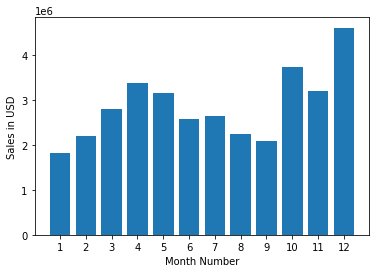

In [40]:
# for x values - month
# for y value = results
months = range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.xlabel('Month Number')
plt.ylabel('Sales in USD')

### What city has the highest number of sales?

In [41]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
 7   Sales             185950 non-null  float64
dtypes: float64(2), int32(2), object(4)
memory usage: 11.3+ MB


In [42]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [43]:
#all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
# speed issue with lamba if having huge volume of data,hence can also use function


In [44]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [45]:
#all_data['State'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[2].slit(' ')[1])

In [46]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


Text(0, 0.5, 'Sales in USD')

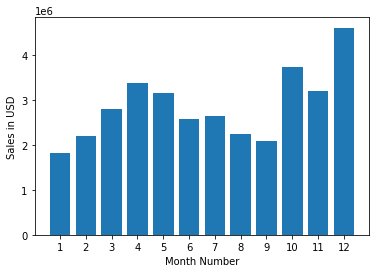

In [47]:
# for x values - month
# for y value = results
months = range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.xlabel('Month Number')
plt.ylabel('Sales in USD')

In [51]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]
all_data['City'] =  all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

In [52]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)


### What city has the highest number of sales?

In [54]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


Text(0, 0.5, 'Sales in USD')

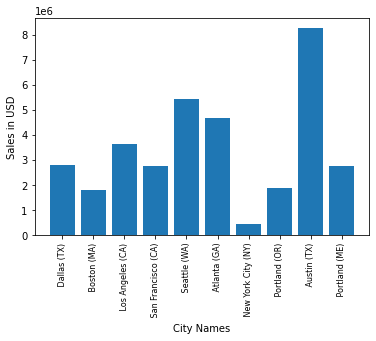

In [57]:
# for x values - city
# for y value = results
cities = all_data['City'].unique()
plt.bar(cities,results['Sales'])
#plt.xticks(cities)
plt.xticks(cities, rotation='vertical',size=8)
plt.xlabel('City Names')
plt.ylabel('Sales in USD')

Text(0, 0.5, 'Sales in USD')

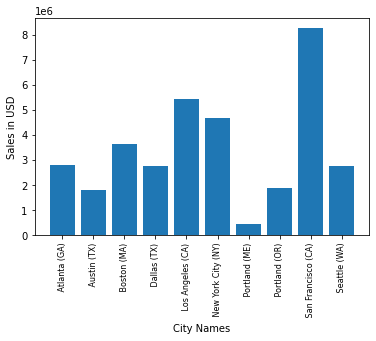

In [58]:
# in the plot Austin was showing the highest sale, hence we are making a slight change here
# for x values - city
# for y value = results
cities = [city for city, df in all_data.groupby('City')]
plt.bar(cities,results['Sales'])
#plt.xticks(cities)
plt.xticks(cities, rotation='vertical',size=8)
plt.xlabel('City Names')
plt.ylabel('Sales in USD')


### What time should we display advertisements to maximize likelihood of customers buying product?

In [64]:
# convert order date to date time
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [68]:
# add hours and minutes columns
all_data['Hours'] = all_data['Order Date'].dt.hour
all_data['Minutes'] = all_data['Order Date'].dt.minute

In [70]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30


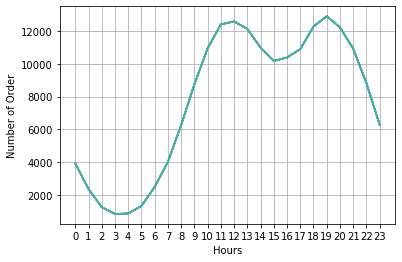

In [76]:
# Groupby hours
hours = [hour for hour, df in all_data.groupby('Hours')]

plt.plot(hours,all_data.groupby(['Hours']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Order')
plt.grid()
         # My recommendation is around 11Am or 7Pm

### What product sold most? Why do you think it sold the most?


In [82]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
product_group.sum()

,Quantity Ordered,Price Each,Month,Sales,Hours,Minutes
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


Text(0.5, 0, 'Products')

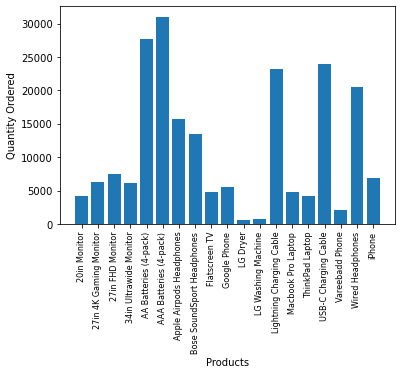

In [92]:
products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(products,rotation='vertical',size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')

In [93]:
prices = all_data.groupby('Product').mean()['Price Each']
# need to add a second y axis

In [94]:
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64